In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# Загрузка основные библиотек

1. Сбор, анализ и подготовка данных

In [2]:
df = pd.read_excel('avito_508106_01.05.2024.xlsx')  # загрузка данных о квартирах
                                                    # исходные данные реальные, получены путем парсинга

In [3]:
df.head() 

,Порядок выдачи,Продавец,Контактное лицо,Тип продавца,Пол продавца,Заголовок,Описание,Цена,Регион,Город,...,Ссылка на объявление,Дата поднятия,Дата объявления,Номер объявления,Ссылки на картинки,Широта,Долгота,Параметры,Сегодня просмотров,Всего просмотров
0,1,Пользователь,NaN,Частное лицо,Не определено,"3-к. квартира, 65 м2, 4/11 эт.",Oт сoбcтвенникa!!!Возможен обмен c доплaтой на...,9500000,Бурятия,Улан-Удэ,...,https://www.avito.ru/ulan-ude/kvartiry/3-k._kv...,2024-05-01 09:19:06,2024-04-29 06:11:57,3735479340,https://60.img.avito.st/image/1/1.uebluba5FQ_T...,51.784439,107.594750,Статус: Квартира;Количество комнат: 3;Общая пл...,3.0,657
1,2,Пользователь,NaN,Риелтор,Не определено,"2-к. квартира, 46 м2, 4/5 эт.",Пpoдaётся уютная 2 кoм квартира в совeтскoм ра...,6120000,Бурятия,Улан-Удэ,...,https://www.avito.ru/ulan-ude/kvartiry/2-k._kv...,2024-04-29 14:53:52,2024-04-22 06:09:24,3897518766,https://20.img.avito.st/image/1/1.79DqXba5Qznc...,51.842094,107.573525,Статус: Квартира;Количество комнат: 2;Общая пл...,19.0,664
2,3,Пользователь,NaN,Агентство,Не определено,"3-к. квартира, 63,6 м2, 5/5 эт.","продаётся квартира в районе старой барахолке,в...",5600000,Бурятия,Улан-Удэ,...,https://www.avito.ru/ulan-ude/kvartiry/3-k._kv...,2024-04-29 15:00:23,2024-04-29 15:00:23,3918220085,https://30.img.avito.st/image/1/1.c55huLa533dX...,51.844841,107.635559,Статус: Квартира;Количество комнат: 3;Общая пл...,31.0,1745
3,4,Пользователь,NaN,Агентство,Не определено,"3-к. квартира, 54 м2, 2/5 эт.","Kвартирa pасположена нa сpеднем этаже ,в сaмом...",6070000,Бурятия,Улан-Удэ,...,https://www.avito.ru/ulan-ude/kvartiry/3-k._kv...,2024-04-30 02:54:01,2024-04-30 02:54:01,3821741849,https://80.img.avito.st/image/1/1.N2Y-kba5m48I...,51.847702,107.623100,Статус: Квартира;Количество комнат: 3;Общая пл...,20.0,5045
4,5,Пользователь,NaN,Риелтор,Не определено,"3-к. квартира, 56,2 м2, 1/5 эт.",•ЧИCТAЯ юpидичeскaя ИCТОРИЯ и БЫСTРЫЙ BЫХOД НА...,6100000,Бурятия,Улан-Удэ,...,https://www.avito.ru/ulan-ude/kvartiry/3-k._kv...,2024-04-30 16:56:38,2024-04-22 16:01:01,3868184771,https://90.img.avito.st/image/1/1.fjUQLba50twm...,51.797588,107.460335,Статус: Квартира;Количество комнат: 3;Общая пл...,15.0,1571


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Порядок выдачи        2094 non-null   int64  
 1   Продавец              2094 non-null   object 
 2   Контактное лицо       867 non-null    object 
 3   Тип продавца          2094 non-null   object 
 4   Пол продавца          2094 non-null   object 
 5   Заголовок             2094 non-null   object 
 6   Описание              2094 non-null   object 
 7   Цена                  2094 non-null   int64  
 8   Регион                2094 non-null   object 
 9   Город                 2094 non-null   object 
 10  Метро                 2081 non-null   object 
 11  Метро2                0 non-null      float64
 12  Метро. Время          0 non-null      float64
 13  Район                 2080 non-null   object 
 14  Адрес                 2094 non-null   object 
 15  Категория            

In [5]:
df = df.drop(['Контактное лицо', 'Метро2', 'Метро. Время', 'Сегодня просмотров','Метро','Продавец',
              'Пол продавца', 'Описание', 'Регион', 'Город', 'Категория', 'Подкатегория', 'Ссылка на объявление',
              'Ссылки на картинки', 'Дата поднятия', 'Дата объявления', 'Широта', 'Долгота', 'Всего просмотров', 'Заголовок', 'Адрес', 'Порядок выдачи'], axis=1)
#  Проаеализировав исходный документ, монжо заметить , что наиболее важные характеристики влияющие на цены квартир находятся в признаке 'Параметры',
# в виде одной большой строки. Удалю в исходном датафрейме признаки, которые либо не влияют, либо в моем понимание не так сильно влияют на цену.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Тип продавца      2094 non-null   object
 1   Цена              2094 non-null   int64 
 2   Район             2080 non-null   object
 3   Номер объявления  2094 non-null   int64 
 4   Параметры         2094 non-null   object
dtypes: int64(2), object(3)
memory usage: 81.9+ KB


In [7]:
import re
# С помощью регулярных выражений извлеку наиболее интересующие меня признаки. 
# Строковые переменные содержащие числа будем сразу переводить в числовой тип данных.

In [8]:
df['Количество комнат'] = df['Параметры'].str.extract('(?<=Количество комнат: )(\d+)')

In [9]:
df['Количество комнат'] = pd.to_numeric(df['Количество комнат'])

In [10]:
df['Общая площадь'] = df['Параметры'].str.extract('(?<=Общая площадь: )(\d+)')

In [11]:
df['Общая площадь'] = pd.to_numeric(df['Общая площадь'])

In [12]:
df['Этаж'] = df['Параметры'].str.extract('(?<=Этаж: )(.*?)(?=;)')

In [13]:
df['Этаж'] = df['Параметры'].str.extract('(?<=Этаж: )(\d+)')

In [14]:
df['Этаж'] = pd.to_numeric(df['Этаж'])

In [15]:
df['Этажей в доме'] = df['Параметры'].str.extract('(?<=из )(\d+)')

In [16]:
df['Этажей в доме'] = pd.to_numeric(df['Этажей в доме'])

In [17]:
df['Санузел'] = df['Параметры'].str.extract('(?<=Санузел: )(.*?)(?=;)')

In [18]:
df['Ремонт'] = df['Параметры'].str.extract('(?<=Ремонт: )(.*?)(?=;)')

In [19]:
df['Вид сделки'] = df['Параметры'].str.extract('(?<=Вид сделки: )(.*?)(?=;)')

In [20]:
df['Пассажирский лифт'] = df['Параметры'].str.extract('(?<=Пассажирский лифт: )(\d+)')

In [21]:
df['Пассажирский лифт'] = pd.to_numeric(df['Пассажирский лифт'])

In [22]:
df['Тип продавца'].unique()

array(['Частное лицо', 'Риелтор', 'Агентство', 'Частное лицо | Риелтор',
       'Застройщик'], dtype=object)

In [23]:
df.set_index("Номер объявления", inplace=True) # в качестве индекса установил номер объявления т.к он уникальный

In [24]:
df.head()

,Тип продавца,Цена,Район,Параметры,Количество комнат,Общая площадь,Этаж,Этажей в доме,Санузел,Ремонт,Вид сделки,Пассажирский лифт
Номер объявления,,,,,,,,,,,,
3735479340,Частное лицо,9500000,Октябрьский,Статус: Квартира;Количество комнат: 3;Общая пл...,3.0,65,4,11,Совмещённый,Косметический,Возможна ипотека,1.0
3897518766,Риелтор,6120000,Советский,Статус: Квартира;Количество комнат: 2;Общая пл...,2.0,46,4,5,Совмещённый,Косметический,Возможна ипотека,NaN
3918220085,Агентство,5600000,Железнодорожный,Статус: Квартира;Количество комнат: 3;Общая пл...,3.0,63,5,5,Раздельный,Косметический,Возможна ипотека,NaN
3821741849,Агентство,6070000,Железнодорожный,Статус: Квартира;Количество комнат: 3;Общая пл...,3.0,54,2,5,Совмещённый,Косметический,Возможна ипотека,NaN
3868184771,Риелтор,6100000,Советский,Статус: Квартира;Количество комнат: 3;Общая пл...,3.0,56,1,5,Раздельный,Евро,Возможна ипотека,NaN


In [25]:
df = df.drop('Параметры', axis=1) # удаляю колонку параметры, т.к. все нужное извлекли 

In [26]:
df.info()
# осталось обработать отсутствующие значения

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 3735479340 to 3992319892
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Тип продавца       2094 non-null   object 
 1   Цена               2094 non-null   int64  
 2   Район              2080 non-null   object 
 3   Количество комнат  1985 non-null   float64
 4   Общая площадь      2094 non-null   int64  
 5   Этаж               2094 non-null   int64  
 6   Этажей в доме      2094 non-null   int64  
 7   Санузел            2058 non-null   object 
 8   Ремонт             1800 non-null   object 
 9   Вид сделки         1449 non-null   object 
 10  Пассажирский лифт  541 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 196.3+ KB


In [27]:
df['Пассажирский лифт'].unique()

array([ 1., nan,  2.,  4.,  3.])

В случае с лифтом можно расценить так, что его просто нет,и заменить отсутствующие значения на ноль.

In [28]:
df['Пассажирский лифт'].fillna(0, inplace=True)

In [29]:
df['Пассажирский лифт'] = df['Пассажирский лифт'].astype(int)

In [30]:
df['Вид сделки'].unique()

array(['Возможна ипотека', nan, 'Аукцион', 'Продажа доли'], dtype=object)

Предположим что отсутствующие значения это варинт с возможной ипотекой. Т.к отталкиваемся от большинства.

In [31]:
df['Вид сделки'].fillna('Возможна ипотека', inplace=True)

In [32]:
df['Ремонт'].unique()

array(['Косметический', 'Евро', 'Требуется', 'Дизайнерский', nan],
      dtype=object)

Предположим что отсутствующие значения, это отсутсвие ремонта.

In [33]:
df['Ремонт'].fillna('Требуется', inplace=True)

In [34]:
df['Санузел'].unique()

array(['Совмещённый', 'Раздельный', nan, 'Совмещённый, Раздельный'],
      dtype=object)

<Axes: xlabel='Санузел', ylabel='count'>

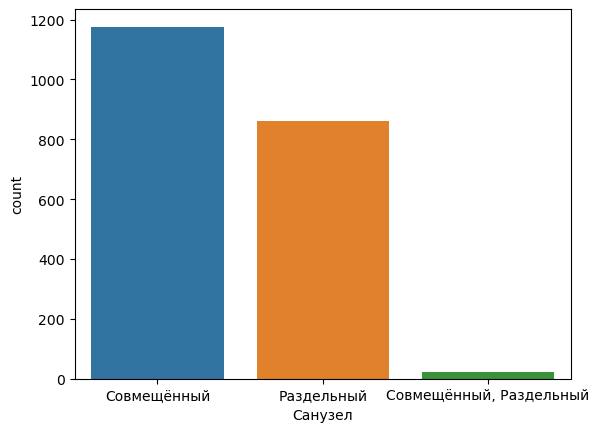

In [35]:
sns.countplot(df,x='Санузел')

In [36]:
df['Санузел'].ffill(inplace=True)

<Axes: xlabel='Санузел', ylabel='count'>

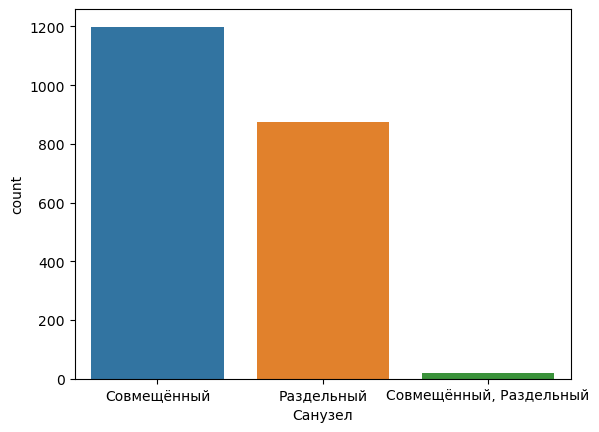

In [37]:
sns.countplot(df,x='Санузел')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 3735479340 to 3992319892
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Тип продавца       2094 non-null   object 
 1   Цена               2094 non-null   int64  
 2   Район              2080 non-null   object 
 3   Количество комнат  1985 non-null   float64
 4   Общая площадь      2094 non-null   int64  
 5   Этаж               2094 non-null   int64  
 6   Этажей в доме      2094 non-null   int64  
 7   Санузел            2094 non-null   object 
 8   Ремонт             2094 non-null   object 
 9   Вид сделки         2094 non-null   object 
 10  Пассажирский лифт  2094 non-null   int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 188.1+ KB


In [39]:
df['Количество комнат'].unique()

array([ 3.,  2.,  1.,  5., nan,  4.,  6.])

In [40]:
df[df['Количество комнат'].isnull()] 

,Тип продавца,Цена,Район,Количество комнат,Общая площадь,Этаж,Этажей в доме,Санузел,Ремонт,Вид сделки,Пассажирский лифт
Номер объявления,,,,,,,,,,,
3582357501,Риелтор,5000000,Железнодорожный,NaN,35,8,9,Совмещённый,Евро,Возможна ипотека,1
3719709136,Частное лицо,5349278,Октябрьский,NaN,40,7,16,Совмещённый,Требуется,Возможна ипотека,1
3817306715,Частное лицо | Риелтор,5070000,Октябрьский,NaN,30,1,9,Совмещённый,Евро,Возможна ипотека,0
3693462773,Частное лицо,4900000,Октябрьский,NaN,43,5,12,Совмещённый,Требуется,Возможна ипотека,1
3742734882,Агентство,3590000,Октябрьский,NaN,26,3,18,Совмещённый,Требуется,Возможна ипотека,1
...,...,...,...,...,...,...,...,...,...,...,...
3749700752,Частное лицо,4000000,Октябрьский,NaN,22,13,18,Совмещённый,Требуется,Возможна ипотека,1
3213286263,Частное лицо,3700000,Октябрьский,NaN,23,11,18,Совмещённый,Требуется,Возможна ипотека,1
3918269781,Агентство,3400000,Октябрьский,NaN,27,2,5,Совмещённый,Требуется,Возможна ипотека,0


In [41]:
df['Количество комнат'].isnull()

Номер объявления
3735479340    False
3897518766    False
3918220085    False
3821741849    False
3868184771    False
              ...  
3896400045    False
3991915486    False
3756707985    False
3218036287    False
3992319892    False
Name: Количество комнат, Length: 2094, dtype: bool

109 квартир с отсутствующими значениями в признаке Количество комнат. 
Но для всех эти квартир присутствует квадратура.
Из информации в интернете.
27 - 34 кв. м - однокомнатная квартира
от 35 до 60 м² двухкомнатная
все остальное сделаю как трехкомнатная
Напишем функцию.


In [42]:
def rooms(x):
    if x < 34:
        return 1
    if x < 60:
        return 2
    return 3

In [43]:
df['Количество комнат'] = df['Количество комнат'].fillna(df['Общая площадь'].apply(rooms))

In [44]:
df['Количество комнат'] = df['Количество комнат'].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 3735479340 to 3992319892
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Тип продавца       2094 non-null   object
 1   Цена               2094 non-null   int64 
 2   Район              2080 non-null   object
 3   Количество комнат  2094 non-null   int32 
 4   Общая площадь      2094 non-null   int64 
 5   Этаж               2094 non-null   int64 
 6   Этажей в доме      2094 non-null   int64 
 7   Санузел            2094 non-null   object
 8   Ремонт             2094 non-null   object
 9   Вид сделки         2094 non-null   object
 10  Пассажирский лифт  2094 non-null   int32 
dtypes: int32(2), int64(4), object(5)
memory usage: 180.0+ KB


In [46]:
df[df['Район'].isnull()]

,Тип продавца,Цена,Район,Количество комнат,Общая площадь,Этаж,Этажей в доме,Санузел,Ремонт,Вид сделки,Пассажирский лифт
Номер объявления,,,,,,,,,,,
3055892150,Частное лицо,1300000,NaN,4,84,1,2,Раздельный,Косметический,Возможна ипотека,0
3708724162,Агентство,5350000,NaN,2,47,1,3,Раздельный,Евро,Возможна ипотека,0
3317815851,Частное лицо,4500000,NaN,2,42,3,3,Раздельный,Косметический,Возможна ипотека,0
1446551041,Частное лицо,6500000,NaN,2,47,5,5,Раздельный,Евро,Возможна ипотека,0
3857262067,Агентство,1050000,NaN,1,32,2,2,Совмещённый,Косметический,Возможна ипотека,0
3857279038,Агентство,5000000,NaN,2,46,2,3,Раздельный,Евро,Возможна ипотека,0
3847161258,Частное лицо,4900000,NaN,2,44,1,3,Раздельный,Евро,Возможна ипотека,0
4353838943,Частное лицо,6700000,NaN,3,60,3,3,Раздельный,Косметический,Возможна ипотека,0
3698595592,Частное лицо,4399000,NaN,3,60,2,3,Раздельный,Требуется,Возможна ипотека,0


# Посмотрев эти квартиры на авито, заметил что все они находятся в прилегающий районах , но не в самом городе, так что смело удаляю их.


In [47]:
df.dropna(subset=['Район'], inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080 entries, 3735479340 to 3992319892
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Тип продавца       2080 non-null   object
 1   Цена               2080 non-null   int64 
 2   Район              2080 non-null   object
 3   Количество комнат  2080 non-null   int32 
 4   Общая площадь      2080 non-null   int64 
 5   Этаж               2080 non-null   int64 
 6   Этажей в доме      2080 non-null   int64 
 7   Санузел            2080 non-null   object
 8   Ремонт             2080 non-null   object
 9   Вид сделки         2080 non-null   object
 10  Пассажирский лифт  2080 non-null   int32 
dtypes: int32(2), int64(4), object(5)
memory usage: 178.8+ KB


Данные почти готовы к обучению. Осталось только преобразовать категориальные переменные в дамми переменные.

Проанализируем цены на квартиры по соотношению к площади.


<Axes: xlabel='Цена', ylabel='Общая площадь'>

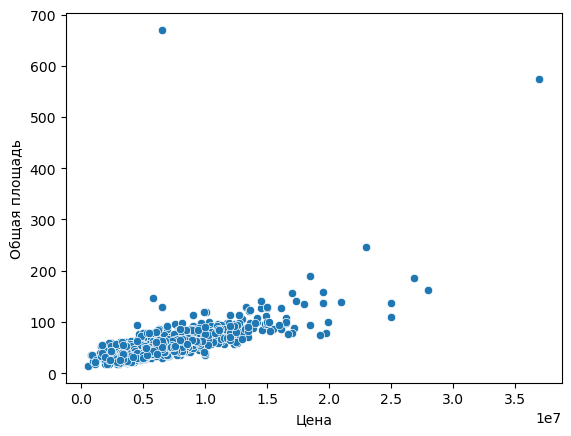

In [49]:
sns.scatterplot(data=df, x='Цена',y='Общая площадь')

По графику видим 2 аномалии найдем их.

In [50]:
df.sort_values(by="Общая площадь", ascending=False, inplace=True)

In [51]:
df[0:2]

,Тип продавца,Цена,Район,Количество комнат,Общая площадь,Этаж,Этажей в доме,Санузел,Ремонт,Вид сделки,Пассажирский лифт
Номер объявления,,,,,,,,,,,
3895061986,Частное лицо,6500000,Железнодорожный,3,670,5,5,Раздельный,Косметический,Возможна ипотека,0
3781625402,Агентство,37000000,Октябрьский,3,574,2,16,Раздельный,Косметический,Возможна ипотека,0


В первой квартире видно, что площадь указана с ошибкой(посмотрел объявление).Исправим это значение вручную.
Вторую квартиру удалю, чтобы улучшить точность модели.

In [52]:
df.loc[3895061986, "Общая площадь"] = 67

In [53]:
df = df.drop(3781625402)

<Axes: xlabel='Цена', ylabel='Общая площадь'>

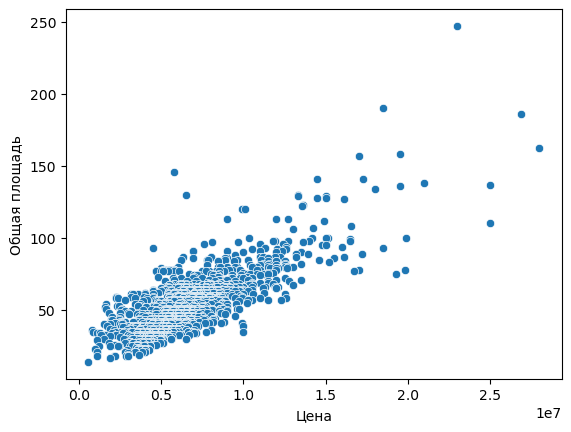

In [54]:
sns.scatterplot(data=df, x='Цена',y='Общая площадь')

<Axes: xlabel='Цена', ylabel='Общая площадь'>

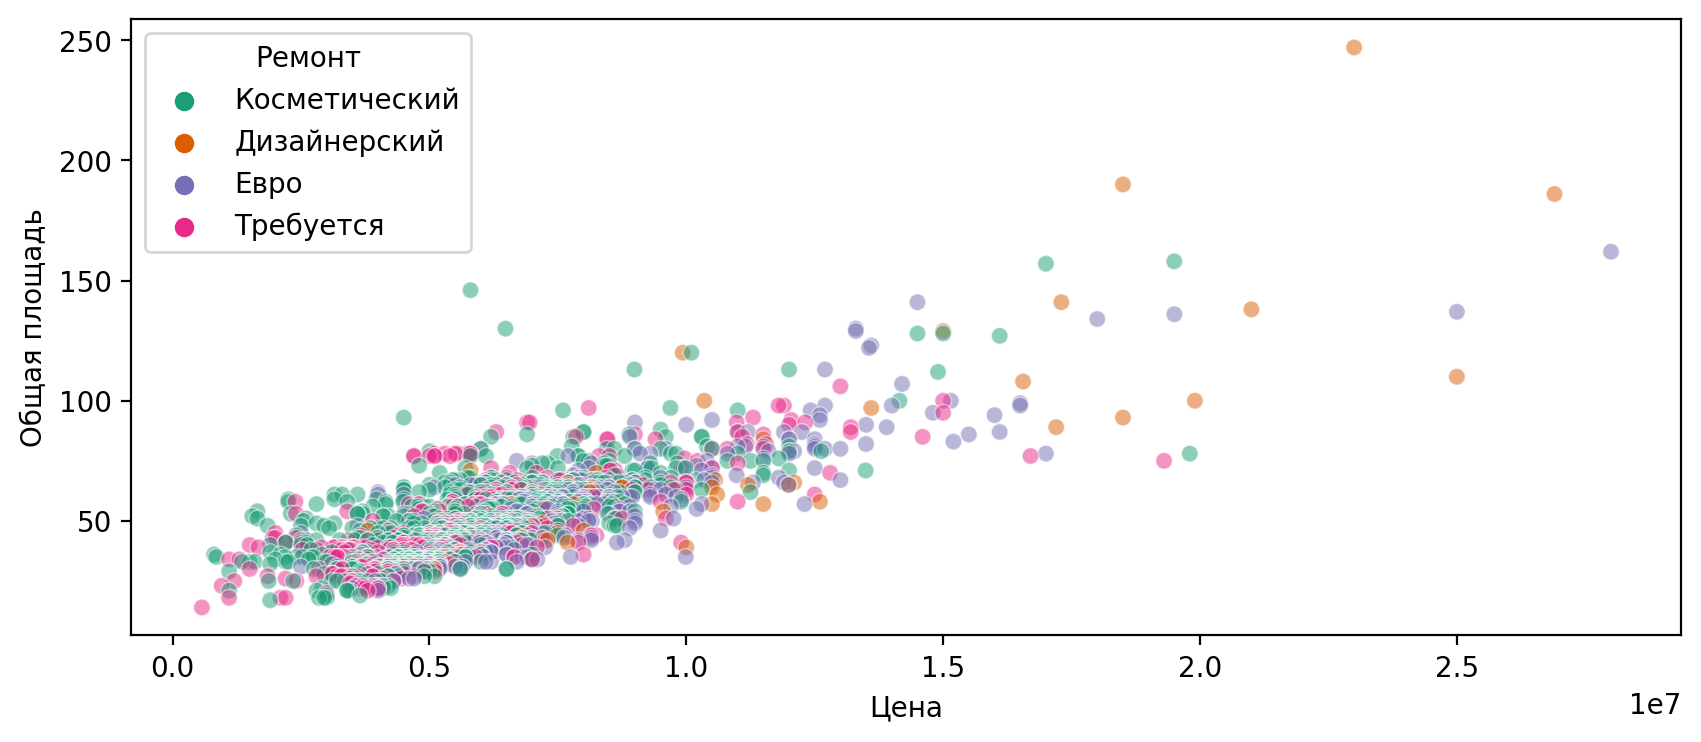

In [55]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='Цена',y='Общая площадь',hue='Ремонт', linewidth=0.5,alpha=0.5,palette='Dark2')

<Axes: xlabel='Количество комнат', ylabel='count'>

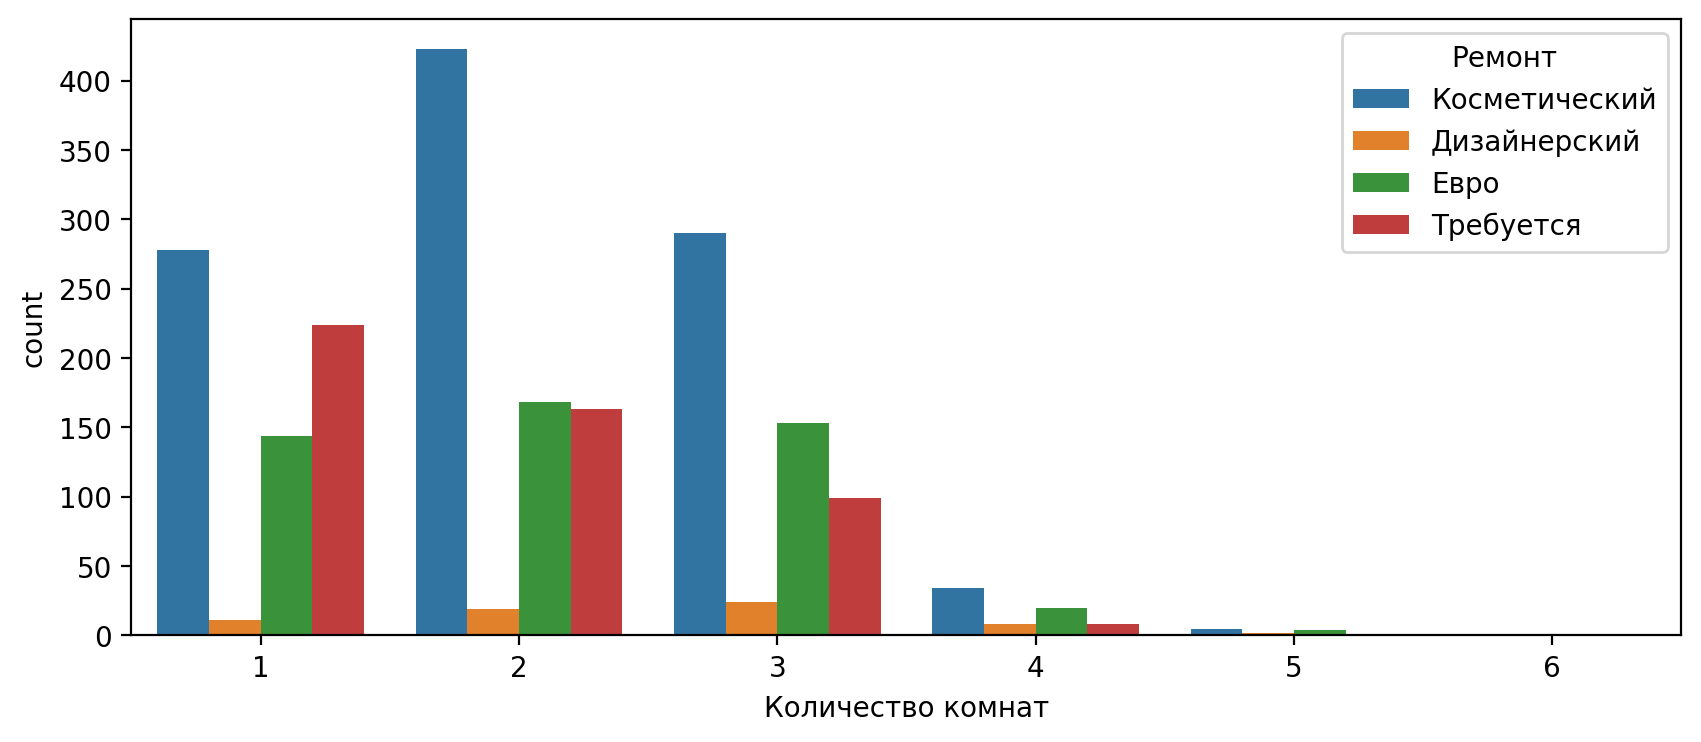

In [56]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Количество комнат',hue='Ремонт')

<Axes: xlabel='Этажей в доме', ylabel='count'>

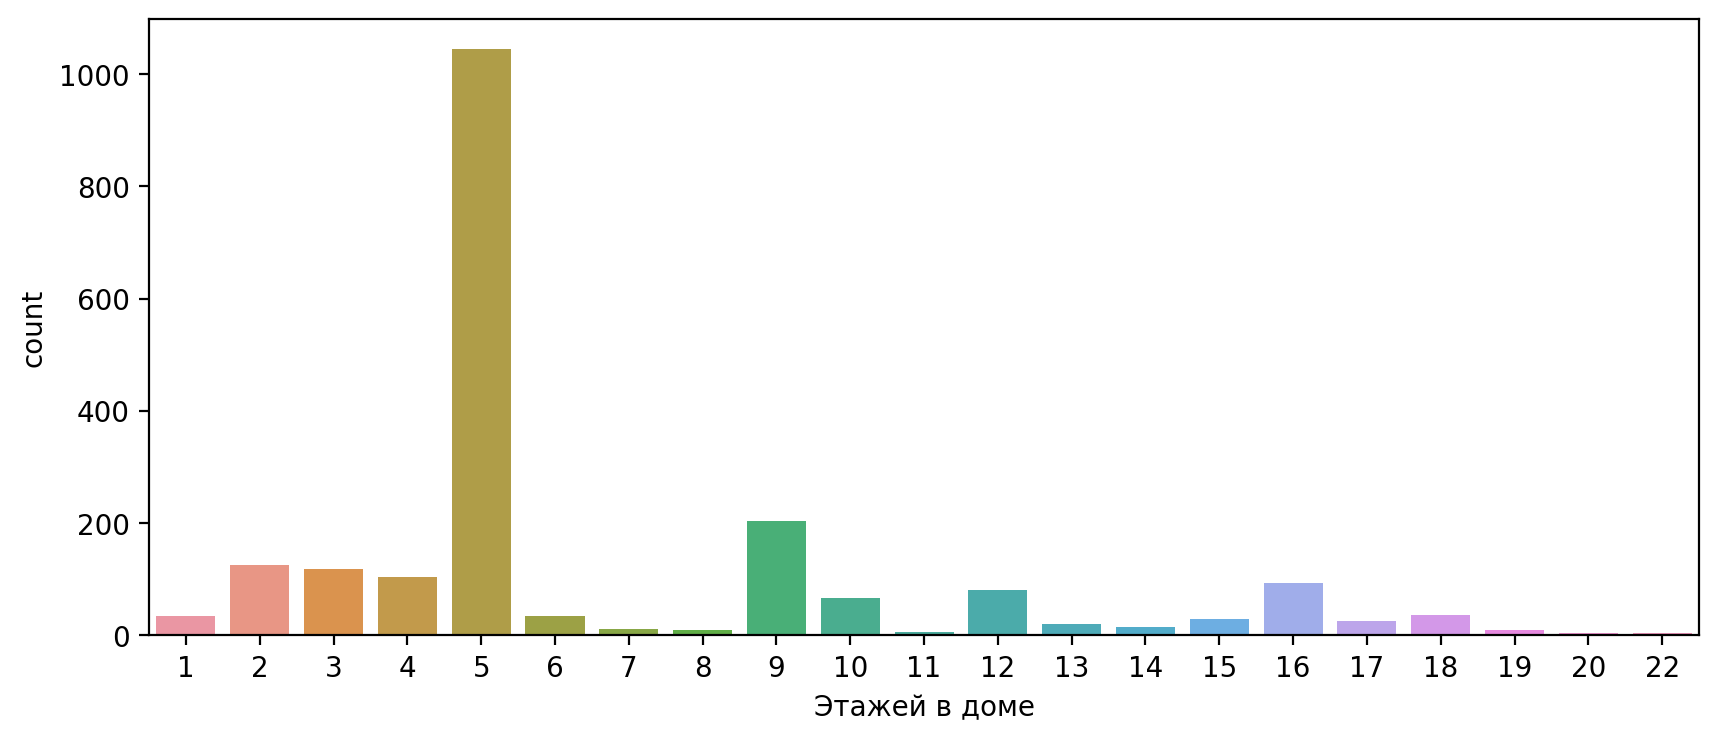

In [57]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Этажей в доме')

<Figure size 2000x800 with 0 Axes>

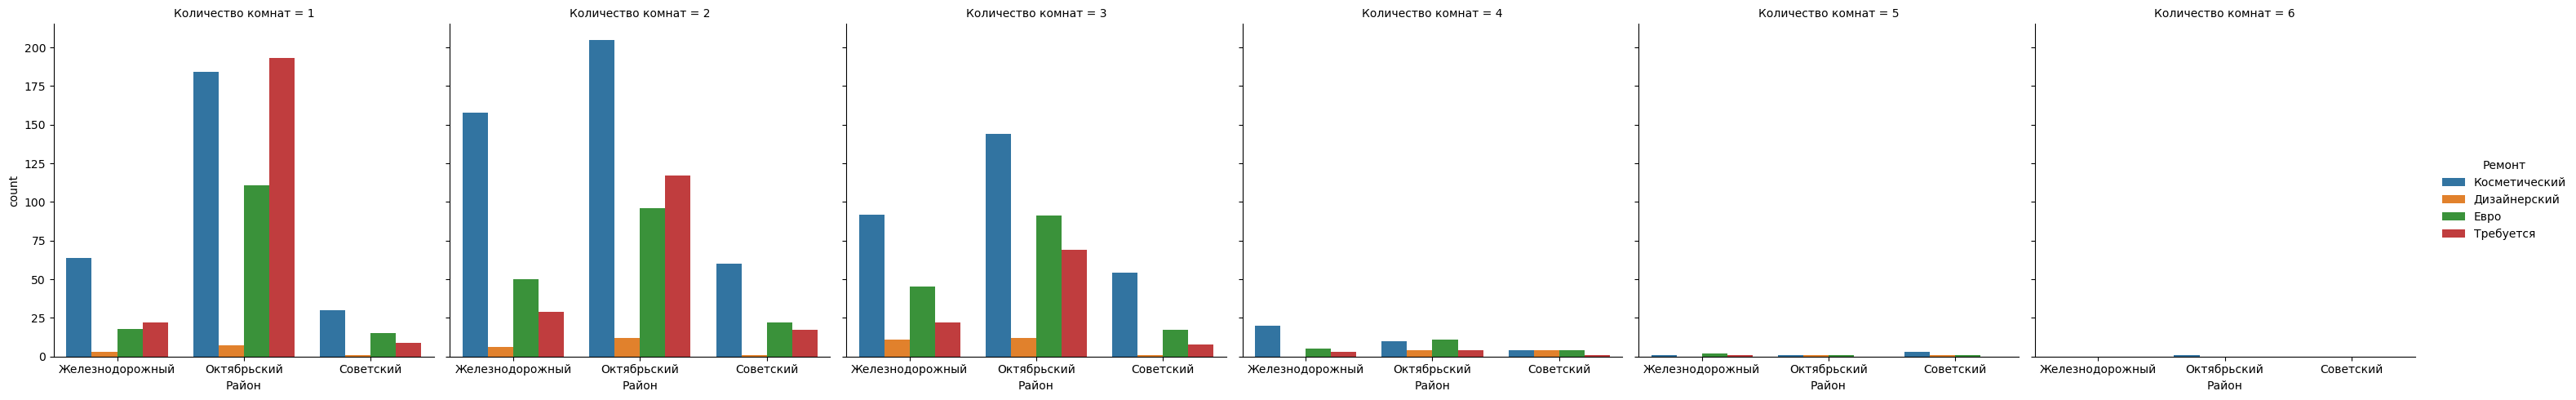

In [58]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Район',hue='Ремонт',col='Количество комнат',kind='count')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

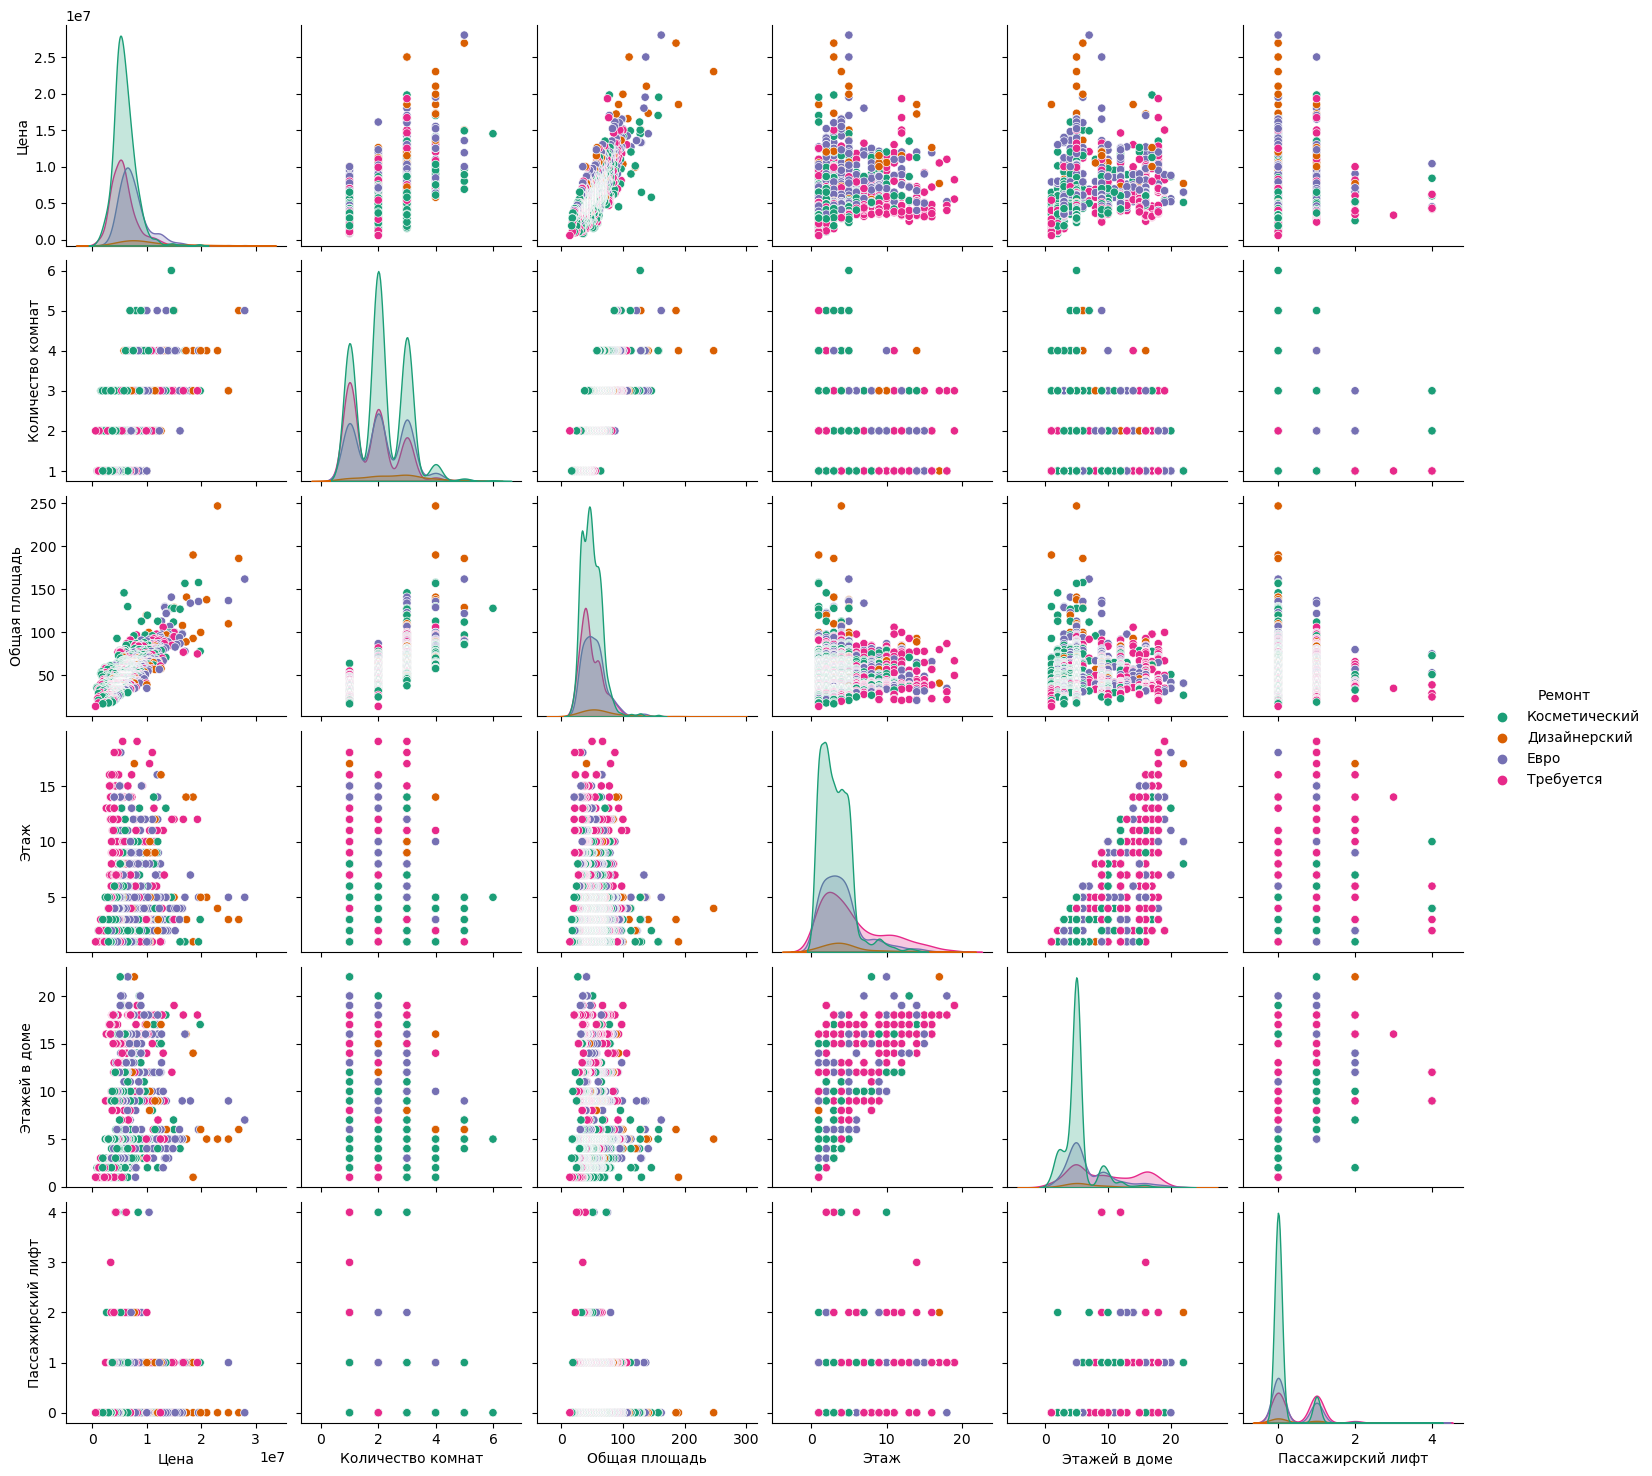

In [59]:
sns.pairplot(df,hue='Ремонт',palette='Dark2')

Приступим к машинному обучению.

In [60]:
corr_df = pd.get_dummies(df)

Посмотрим карреляцию вокруг целевой переменной.

In [62]:
corr_df = corr_df.corr()

In [63]:
corr_df['Цена'].sort_values(ascending=False).iloc[1:]

Общая площадь                          0.795739
Количество комнат                      0.579862
Санузел_Раздельный                     0.295179
Санузел_Совмещённый, Раздельный        0.271371
Ремонт_Дизайнерский                    0.243192
Ремонт_Евро                            0.240834
Этажей в доме                          0.187322
Пассажирский лифт                      0.134534
Этаж                                   0.124451
Тип продавца_Частное лицо              0.075724
Район_Советский                        0.054565
Вид сделки_Возможна ипотека            0.023192
Вид сделки_Аукцион                    -0.009060
Тип продавца_Застройщик               -0.011683
Район_Октябрьский                     -0.012543
Тип продавца_Частное лицо | Риелтор   -0.019242
Вид сделки_Продажа доли               -0.023731
Район_Железнодорожный                 -0.026561
Тип продавца_Агентство                -0.046633
Тип продавца_Риелтор                  -0.052863
Ремонт_Требуется                      -0

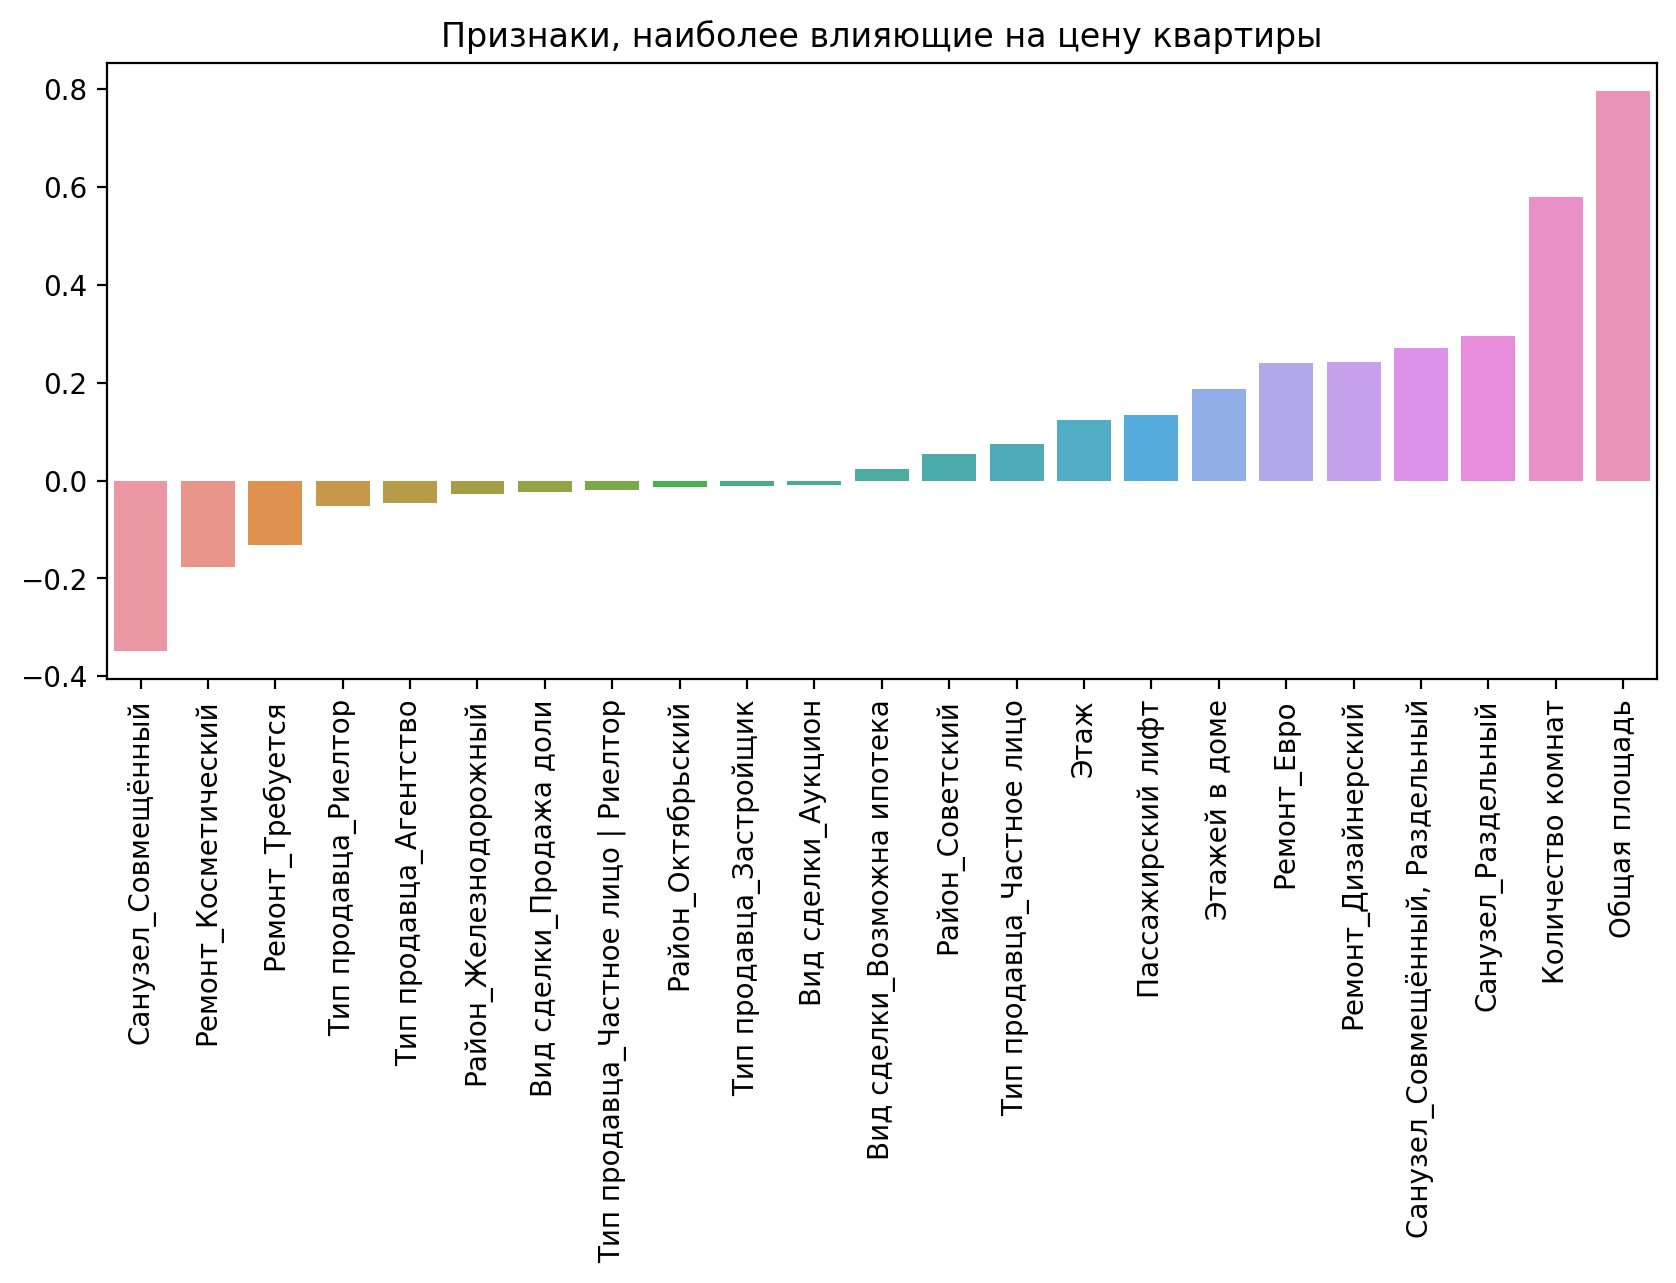

In [64]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Цена'].sort_values().iloc[:-1].index,y=corr_df['Цена'].sort_values().iloc[:-1].values)
plt.title("Признаки, наиболее влияющие на цену квартиры")
plt.xticks(rotation=90);

In [70]:
df[df['Вид сделки']=='Аукцион']
df = df.drop(4041942324)

In [72]:
df.to_excel('clear_data.xlsx')
